Data Pre-processing

In [ ]:
print(is_cuda)

In [1]:
import pandas as pd
import random
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Reading data files
df = pd.read_csv("a3_train_final.tsv",sep = '\t', header=None, names=["label", "text"])

# Defining a function to handle inconsistent labels
def vote_label(label):
    # Split the label into a list
    label_list = label.split("/")

    # Counting the occurrences of each label
    positive_count, negative_count, uncertain_count = 0, 0, 0
    for text in label_list:
        if text == '1':
            positive_count += 1
        elif text == '0':
            negative_count += 1
        elif text == '-1':
            uncertain_count += 1

    # Determining the final label by majority voting (if tied, take -1)
    if positive_count > negative_count and positive_count > uncertain_count:
        return '1'
    elif negative_count > positive_count and negative_count > uncertain_count:
        return '0'
    else:
        return '-1'

# Applying the function to the label column of the dataframe
df["label"] = df["label"].apply(vote_label)

# Output the CSV file
df.to_csv("a3_train_dataset.csv", header=False, index=False)
print('Pre-processing done.')

Pre-processing done.


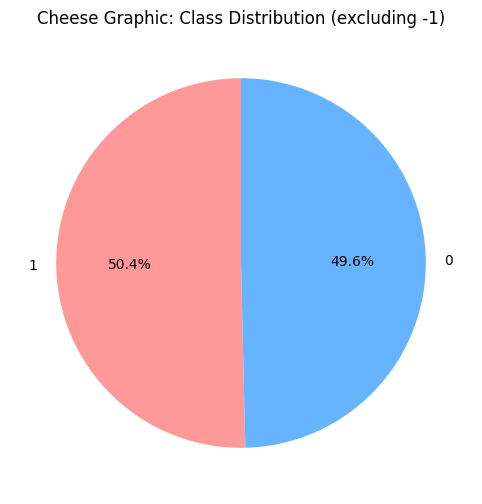

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading data files
df = pd.read_csv("a3_train_final.tsv", sep='\t', header=None, names=["label", "text"])

# Filter rows with labels '1' and '0'
df_filtered = df[(df['label'] == '1') | (df['label'] == '0')]

# Counting the occurrences of each class
class_counts = df_filtered['label'].value_counts()

# Plotting the cheese graphic
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, colors=['#ff9999', '#66b3ff'], autopct='%1.1f%%', startangle=90)
plt.title('Cheese Graphic: Class Distribution (excluding -1)')
plt.show()



Vectorizers Methods

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define a function to evaluate the classification performance
def evaluate_classifier(clf, X_train, X_test, y_train, y_test):
    # Fit the classifier on the train set
    clf.fit(X_train, y_train)
    
    # Predict the labels on the test set
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]

    # Compute the metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob) # ROC curve parameters
    auc_score = auc(fpr, tpr) # area under the curve
    
    print(f'Accuracy: {acc:.8f}')
    print(f'Precision: {prec:.8f}')
    print(f'Recall: {rec:.8f}')
    print(f'F1-score: {f1:.8f}')
    print(f'AUC: {auc_score:.8f}')
    
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--') # diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    # Plot the confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

DictVectorizer:
Accuracy: 0.85090731
Precision: 0.86294416
Recall: 0.83415113
F1-score: 0.84830339
AUC: 0.92421828


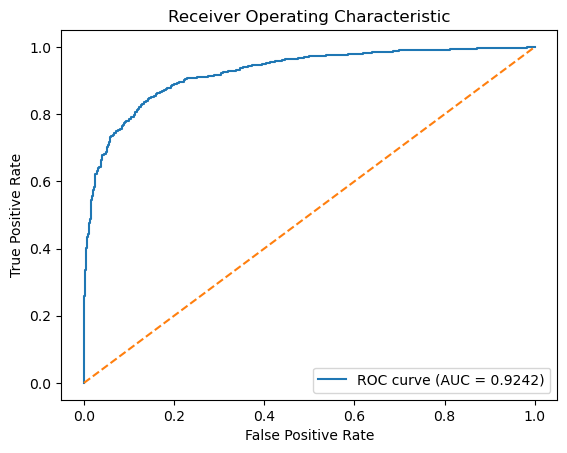

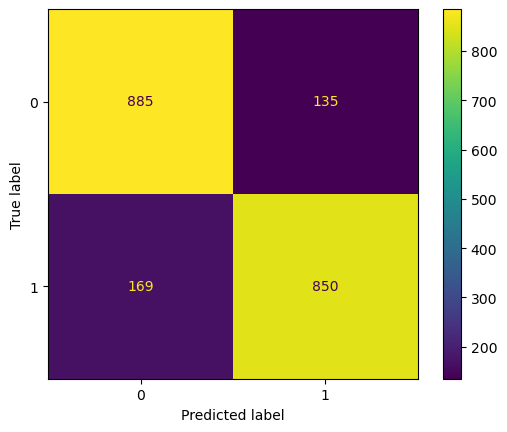

CountVectorizer:
Accuracy: 0.85188818
Precision: 0.85320197
Recall: 0.84985280
F1-score: 0.85152409
AUC: 0.91911043


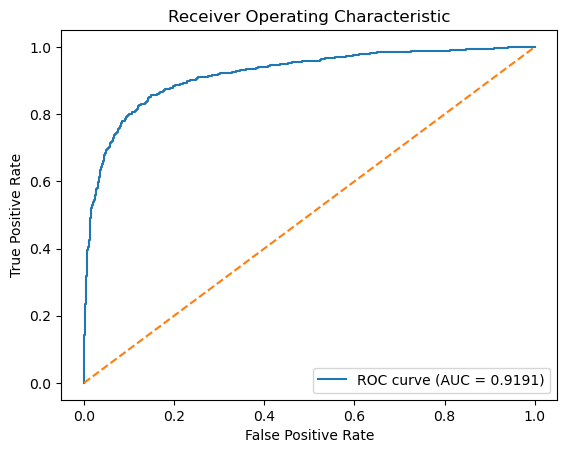

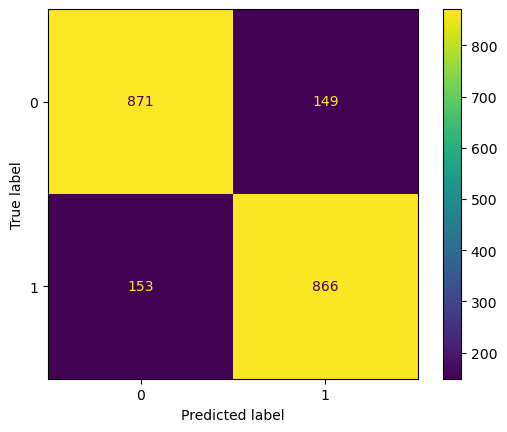

TfidfVectorizer:
Accuracy: 0.85139774
Precision: 0.85305720
Recall: 0.84887144
F1-score: 0.85095917
AUC: 0.92152533


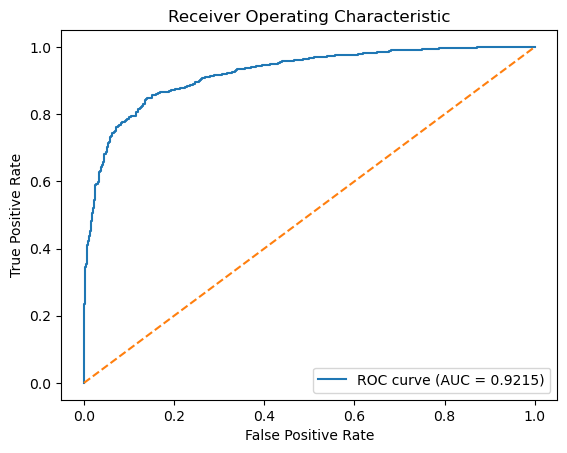

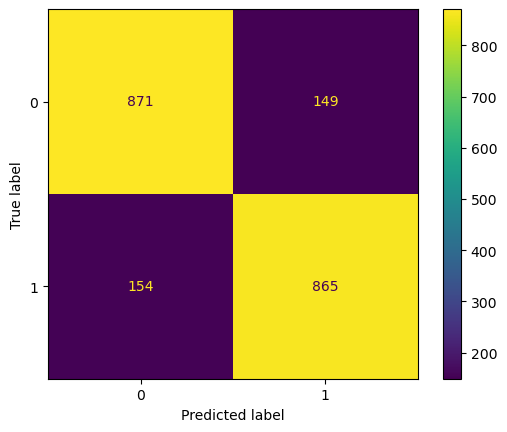

HashingVectorizer:
Accuracy: 0.85384993
Precision: 0.84830918
Recall: 0.86162905
F1-score: 0.85491723
AUC: 0.92808309


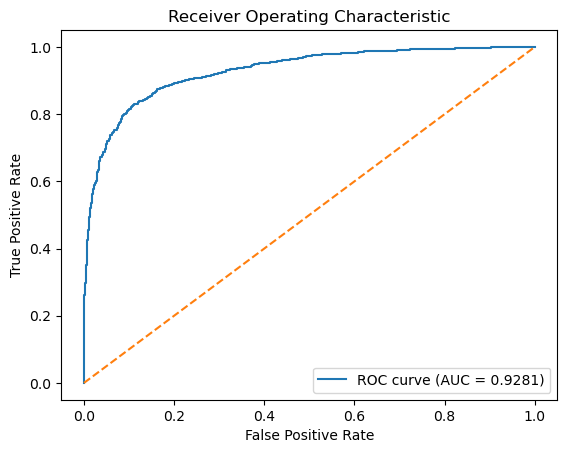

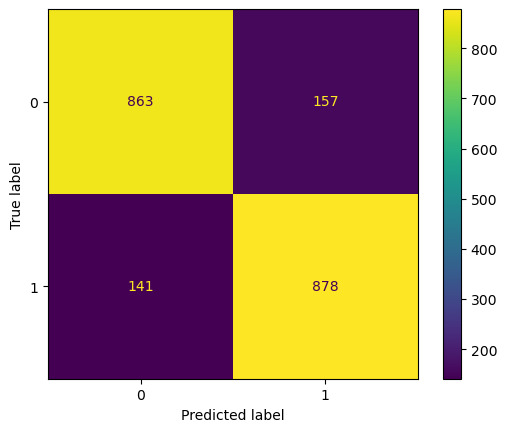

In [3]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression

# Reading training data and test data
train_data = pd.read_csv('a3_train_dataset.csv', header=None, names=['label', 'text'])
train_data = train_data[train_data.iloc[:, 0] != -1] # Remove rows with a value of -1 in the first column (Dataset B)
test_data = pd.read_csv('a3_test.tsv', sep='\t', header=None, names=['label', 'text'])

# Defining four vectorization methods
dict_vectorizer = DictVectorizer()
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()
hashing_vectorizer = HashingVectorizer()

# Defining four classifiers
dict_classifier = LogisticRegression(C=1, penalty='l2', solver='lbfgs', max_iter=1000, random_state=2024)
count_classifier = LogisticRegression(C=1, penalty='l2', solver='liblinear',max_iter=1000,random_state=2024)
tfidf_classifier = LogisticRegression(C=1, penalty='l1', solver='liblinear',max_iter=1000,random_state=2024)
hashing_classifier = LogisticRegression(C=10, penalty='l2', solver='lbfgs',max_iter=1000,random_state=2024)

# Text needs to be converted to dictionary form, e.g., {'this': 1, 'is': 1, 'a': 1, 'text': 1}
train_dict = train_data['text'].apply(lambda x: dict(zip(x.split(), [1] * len(x.split()))))
test_dict = test_data['text'].apply(lambda x: dict(zip(x.split(), [1] * len(x.split()))))

# Using DictVectorizer to vectorize training and test data
train_dict_vector = dict_vectorizer.fit_transform(train_dict)
test_dict_vector = dict_vectorizer.transform(test_dict)

# Using CountVectorizer to vectorize training and test data
train_count_vector = count_vectorizer.fit_transform(train_data['text'])
test_count_vector = count_vectorizer.transform(test_data['text'])

# Using TfidfVectorizer to vectorize training and test data
train_tfidf_vector = tfidf_vectorizer.fit_transform(train_data['text'])
test_tfidf_vector = tfidf_vectorizer.transform(test_data['text'])

# Using HashingVectorizer to vectorize training and test data
train_hashing_vector = hashing_vectorizer.fit_transform(train_data['text'])
test_hashing_vector = hashing_vectorizer.transform(test_data['text'])

print('DictVectorizer:')
evaluate_classifier(dict_classifier, train_dict_vector, test_dict_vector, train_data['label'], test_data['label'])
print('CountVectorizer:')
evaluate_classifier(count_classifier, train_count_vector, test_count_vector, train_data['label'], test_data['label'])
print('TfidfVectorizer:')
evaluate_classifier(tfidf_classifier, train_tfidf_vector, test_tfidf_vector, train_data['label'], test_data['label'])
print('HashingVectorizer:')
evaluate_classifier(hashing_classifier, train_hashing_vector, test_hashing_vector, train_data['label'], test_data['label'])


BERT Model Training

In [5]:

import pandas as pd
import torch
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Read file into DataFrame
train_data = pd.read_csv('a3_train_dataset.csv', header=None, names=['label', 'text'])
train_data = train_data[train_data.iloc[:, 0] != -1] # Remove rows with a value of -1 in the first column
test_data = pd.read_csv('a3_test.tsv', sep='\t', header=None, names=['label', 'text'])

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Set training parameters
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
MAX_LENGTH = 128
EPOCHS = 5

# Convert training data into a format acceptable by the model
train_inputs = tokenizer(train_data['text'].tolist(), padding=True, truncation=True, max_length=MAX_LENGTH, return_tensors='pt') # Use tokenizer to convert a list of texts into tensors, perform padding and truncation, return PyTorch tensors
train_labels = torch.tensor(train_data['label'].tolist()) # Convert label list into tensors
test_inputs = tokenizer(test_data['text'].tolist(), padding=True, truncation=True, max_length=MAX_LENGTH, return_tensors='pt')
test_labels = torch.tensor(test_data['label'].tolist())

# Create a tensor dataset containing the input id, attention mask, and label
train_dataset = TensorDataset(train_inputs['input_ids'], train_inputs['attention_mask'], train_labels) 
val_dataset = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], test_labels)

# Build dataloader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Set optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
loss_fn = CrossEntropyLoss()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [4]:
import pandas as pd
import torch
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Read file into DataFrame
train_data = pd.read_csv('a3_train_dataset.csv', header=None, names=['label', 'text'])
train_data = train_data[train_data.iloc[:, 0] != -1] # Remove rows with a value of -1 in the first column
test_data = pd.read_csv('a3_test.tsv', sep='\t', header=None, names=['label', 'text'])

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Set training parameters
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
MAX_LENGTH = 128
EPOCHS = 5

# Convert training data into a format acceptable by the model
train_inputs = tokenizer(train_data['text'].tolist(), padding=True, truncation=True, max_length=MAX_LENGTH, return_tensors='pt') # Use tokenizer to convert a list of texts into tensors, perform padding and truncation, return PyTorch tensors
train_labels = torch.tensor(train_data['label'].tolist()) # Convert label list into tensors
test_inputs = tokenizer(test_data['text'].tolist(), padding=True, truncation=True, max_length=MAX_LENGTH, return_tensors='pt')
test_labels = torch.tensor(test_data['label'].tolist())

# Create a tensor dataset containing the input id, attention mask, and label
train_dataset = TensorDataset(train_inputs['input_ids'], train_inputs['attention_mask'], train_labels) 
val_dataset = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], test_labels)

# Build dataloader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Set optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
loss_fn = CrossEntropyLoss()

# Model training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(EPOCHS):
    model.train()
    # Initialize total loss for epochs
    train_loss = 0.0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}'):
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        optimizer.zero_grad() # Clear gradients
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels) # Pass inputs through model, get outputs
        loss = outputs.loss # Get loss
        loss.backward() # Backpropagate loss
        optimizer.step() # Update parameters
        
        train_loss += loss.item() # Accumulate loss for batches
    
    train_loss /= len(train_loader)
    
    # Evaluate model on validation set
    model.eval()
    val_preds = []
    val_targets = []
    for batch in val_loader:
        with torch.no_grad():
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits 
            preds = torch.argmax(logits, dim=1).detach().cpu().numpy() # Get predicted results

            val_preds.extend(preds)
            val_targets.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(val_targets, val_preds)
    print(f'Epoch {epoch + 1}: Train Loss: {train_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

# Save model
torch.save(model.state_dict(), 'vaccine_model.pth')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

KeyboardInterrupt: 

BERT Model Accuracy Verification

In [7]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.utils.rnn import pad_sequence

# Load model structure
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Load model parameters
model.load_state_dict(torch.load('vaccine_model.pth'))

# Set model to evaluation mode
model.eval()

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Input data
text = "We need vaccination to survive"
tokens = tokenizer.tokenize(text)
input_ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.tensor(input_ids).unsqueeze(0)  # Add batch dimension
attention_mask = torch.ones_like(input_ids)  # Attention mask for all tokens

# Padding
max_length = 512
if input_ids.size(1) < max_length:
    padding_length = max_length - input_ids.size(1)
    input_ids = torch.cat([input_ids, torch.zeros((1, padding_length), dtype=torch.long)], dim=1)
    attention_mask = torch.cat([attention_mask, torch.zeros((1, padding_length), dtype=torch.long)], dim=1)

# Use the model for prediction
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs[0]  # Access the first element of the tuple

# Output prediction results
predicted_class = torch.argmax(logits, dim=1).item()
if predicted_class == 1:
    print("1, Support for vaccination.")
else:
    print("0, Opposition to vaccination.")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [ ]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Define your data loaders for the training and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
# Load model structure
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Load model parameters
model.load_state_dict(torch.load('vaccine_model.pth'))

# Set model to evaluation mode
model.eval()

# Set model to evaluation mode
model.eval()

# Initialize lists to store predictions and labels
train_preds = []
train_labels = []
test_preds = []
test_labels = []

# Iterate through training set
for inputs, labels in train_loader:
    with torch.no_grad():
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        train_preds.extend(preds.tolist())
        train_labels.extend(labels.tolist())

# Iterate through test set
for inputs, labels in test_loader:
    with torch.no_grad():
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        test_preds.extend(preds.tolist())
        test_labels.extend(labels.tolist())

# Calculate evaluation metrics
train_accuracy = accuracy_score(train_labels, train_preds)
train_precision = precision_score(train_labels, train_preds)
train_recall = recall_score(train_labels, train_preds)
train_f1 = f1_score(train_labels, train_preds)
fpr_train, tpr_train, _ = roc_curve(train_labels, train_preds)
train_auc = auc(fpr_train, tpr_train)

test_accuracy = accuracy_score(test_labels, test_preds)
test_precision = precision_score(test_labels, test_preds)
test_recall = recall_score(test_labels, test_preds)
test_f1 = f1_score(test_labels, test_preds)
fpr_test, tpr_test, _ = roc_curve(test_labels, test_preds)
test_auc = auc(fpr_test, tpr_test)

# Print or use the evaluation metrics as needed
print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"AUC: {train_auc}")

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"AUC: {test_auc}")


In [2]:
import pandas as pd
import torch
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Read file into DataFrame
train_data = pd.read_csv('a3_train_dataset.csv', header=None, names=['label', 'text'])
train_data = train_data[train_data.iloc[:, 0] != -1] # Remove rows with a value of -1 in the first column
test_data = pd.read_csv('a3_test.tsv', sep='\t', header=None, names=['label', 'text'])
# Convert training data into a format acceptable by the model
train_inputs = tokenizer(train_data['text'].tolist(), padding=True, truncation=True, max_length=MAX_LENGTH, return_tensors='pt') # Use tokenizer to convert a list of texts into tensors, perform padding and truncation, return PyTorch tensors
train_labels = torch.tensor(train_data['label'].tolist()) # Convert label list into tensors
test_inputs = tokenizer(test_data['text'].tolist(), padding=True, truncation=True, max_length=MAX_LENGTH, return_tensors='pt')
test_labels = torch.tensor(test_data['label'].tolist())

# Create a tensor dataset containing the input id, attention mask, and label
train_dataset = TensorDataset(train_inputs['input_ids'], train_inputs['attention_mask'], train_labels) 
val_dataset = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], test_labels)

# Build dataloader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

NameError: name 'tokenizer' is not defined